In [53]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')
diamonds_test.info()#Esto es lo que tengo que sacar del .db

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [44]:
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


Una vez hemos transformado el .db a .csv leemos el fichero

In [45]:
diamonds_train = pd.read_csv('./data/diamonds_train.csv')
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_id      40455 non-null  object 
 1   price         40455 non-null  int64  
 2   city_id       40455 non-null  object 
 3   carat         40455 non-null  float64
 4   city_id.1     40455 non-null  object 
 5   city          40455 non-null  object 
 6   index_id.1    40455 non-null  object 
 7   depth         40455 non-null  float64
 8   table         40455 non-null  float64
 9   x             40455 non-null  float64
 10  y             40455 non-null  float64
 11  z             40455 non-null  float64
 12  index_id.2    40455 non-null  object 
 13  cut_id        40455 non-null  object 
 14  color_id      40455 non-null  object 
 15  clarity_id    40455 non-null  object 
 16  clarity_id.1  40455 non-null  object 
 17  clarity       40455 non-null  object 
 18  color_id.1    40455 non-nu

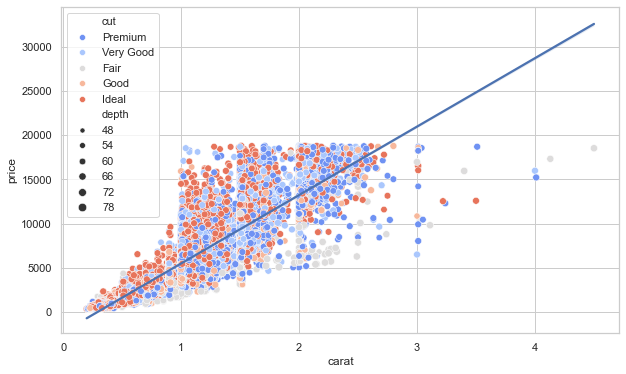

In [46]:
sns.set(style="whitegrid")

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds_train, x="carat", y="price", size="depth", hue="cut", palette="coolwarm")

# Añadir línea de tendencia (OLS)
sns.regplot(data=diamonds_train, x="carat", y="price", scatter=False)

# Mostrar la gráfica
plt.show()

In [26]:
diamonds_clean = diamonds_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'city', 'price']]
diamonds_clean.head()
diamonds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   city     40455 non-null  object 
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
#empezamos a ver los datos

In [32]:
diamonds_clean["size"] = diamonds_clean["x"] * diamonds_clean["y"] * diamonds_clean["z"]
diamonds_clean

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_70623/2707740002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_clean["size"] = diamonds_clean["x"] * diamonds_clean["y"] * diamonds_clean["z"]


,carat,cut,color,clarity,depth,table,x,y,z,city,price,size
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686,113.436890
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882,168.429975
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,7.10,7.04,4.43,Antwerp,10070,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,8.31,8.25,4.73,Madrid,12615,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,6.37,6.42,4.01,Kimberly,5457,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,4.45,4.47,2.76,Kimberly,456,54.900540


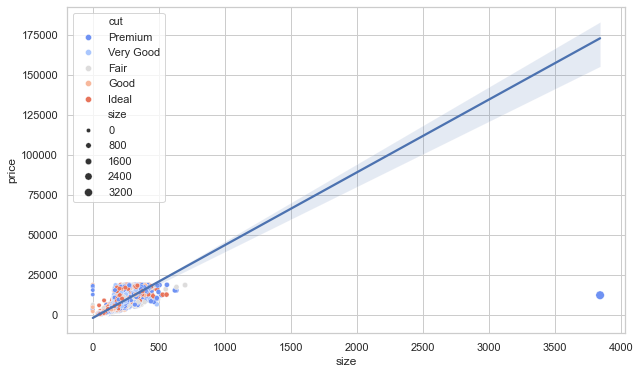

In [49]:
sns.set(style="whitegrid")

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds_clean, x="size", y="price", size="size", hue="cut", palette="coolwarm")

# Añadir línea de tendencia (OLS)
sns.regplot(data=diamonds_clean, x="size", y="price", scatter=False)

# Mostrar la gráfica
plt.show()

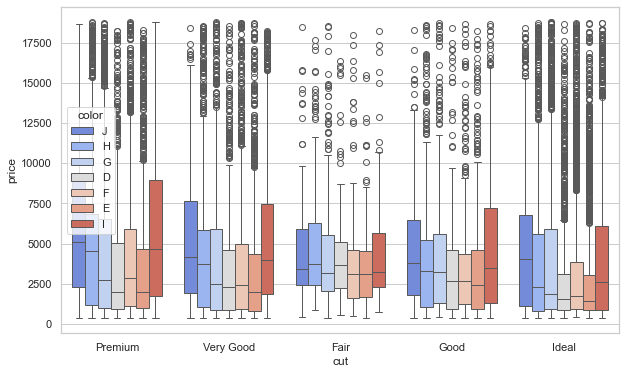

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds_clean, x="cut", y="price", hue="color", palette="coolwarm")
plt.show()

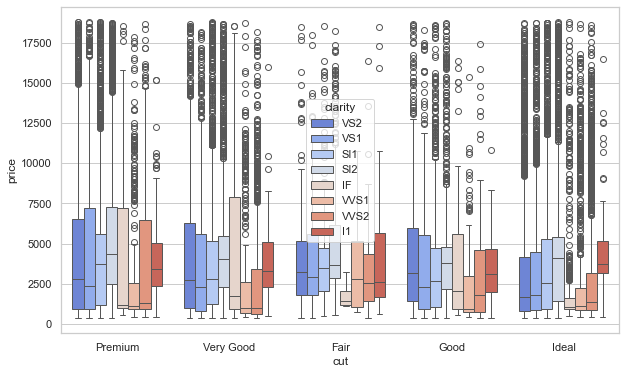

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds_clean, x="cut", y="price", hue="clarity", palette="coolwarm")
plt.show()